In [17]:
from runner import TestRunner, TestPlan, TestStep
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Print available COM ports (pass to TestPlan __init__).
print(TestRunner.available_ports())

# Datapoints are organized by "keys," available values are below.
print(TestRunner.keys())

['/dev/cu.Bluetooth-Incoming-Port', '/dev/cu.usbserial-0001']
['time_ms', 'top_motor_rpm', 'bottom_motor_rpm', 'batt_voltage_V', 'batt_current_A', 'top_current_A', 'bottom_current_A', 'thrust_N', 'torque_N']


In [30]:
# 1. Create a test plan consisting of steps.
steps = [TestStep(bottom_throttle=i, top_throttle=i, duration_ms=5000) for i in np.arange(5, 10, 5)]
plan = TestPlan(
    "test",
    steps=steps
)
plan

TestPlan(name='test', steps=[TestStep(duration_ms=5000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None)])

In [31]:
# 2. Connect to jig and run the test.
runner = TestRunner(port="/dev/cu.usbserial-0001", timeout=0.1)
runner.run(plan=plan)

Tx: Begin new test spec
FAIL Rx 1: Thrust Jig Firmware Program

Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx 2: Setting up

FAIL Rx 3: 
Arming...
FAIL Rx 4: 
Running test...
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: Ready to load test spec

Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: 
Skipped rx
Rx 5: Starting test

Skipped rx
Rx 5: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx 5: 444,0,0,17.955000,10.240000,0.189020,-0.208650,-0.001589,0.000000

Rx 5: 5174,0,0,17.177999,10.240000,0.203560,-0.222560,-0.001589,0.000000

Rx 5: 8163,0,

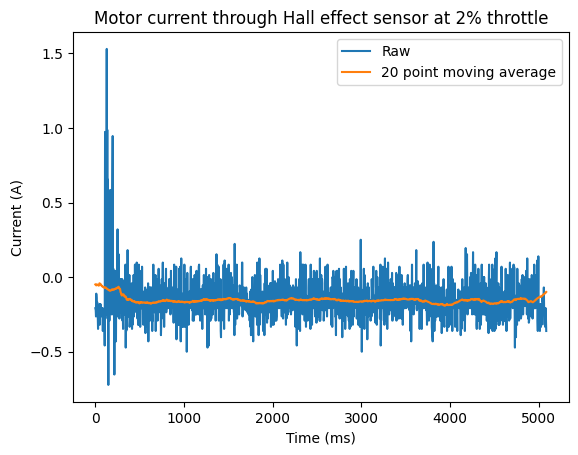

In [32]:
# 3. Plot data or get values as Numpy array.
# runner.plot("bottom_current_A")
time_ms = runner.values("time_ms")
bottom_current = runner.values("bottom_current_A")
plt.plot(time_ms, bottom_current, label='Raw')
flt_current = np.convolve(bottom_current, np.ones(100), 'same') / 100
plt.plot(time_ms, flt_current, label='20 point moving average')
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')
plt.title('Motor current through Hall effect sensor at 2% throttle')
plt.legend()

-0.11789154320987655


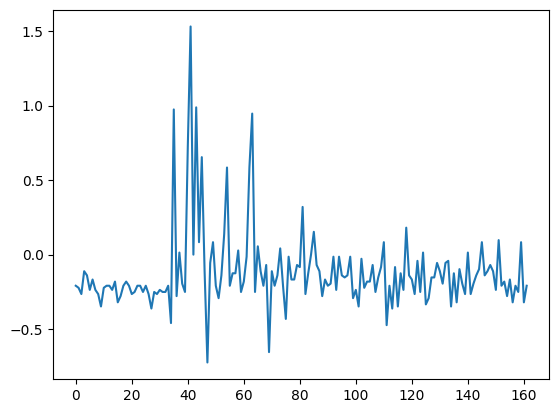

In [72]:
data = runner.values("bottom_current_A", tmin=0, tmax=500)
plt.plot(data)
print(np.average(data))

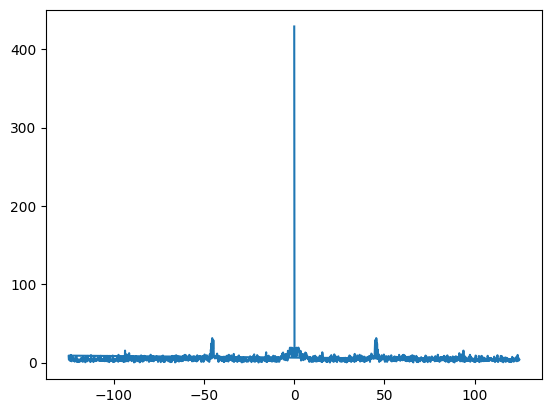

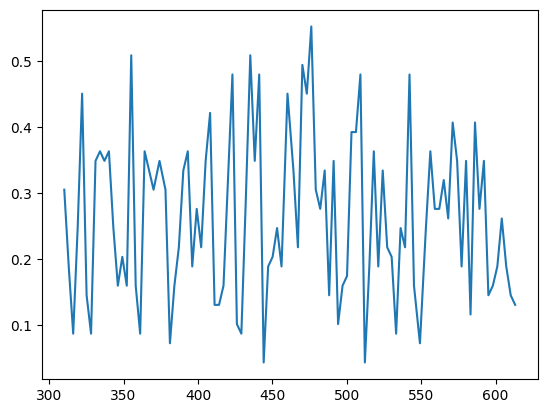

In [65]:
# 3. Plot data or get values as Numpy array.
# runner.plot("bottom_current_A")
time_ms = runner.values("time_ms")
top_current = runner.values("top_current_A")
# plt.plot(time_ms, top_current, label='Raw')
# flt_current = np.convolve(top_current, np.ones(20), 'same') / 20
# plt.plot(time_ms, flt_current, label='20 point moving average')
# plt.xlabel('Time (ms)')
# plt.ylabel('Current (A)')
# plt.title('Motor current through Hall effect sensor at 2% throttle')
# plt.legend()

fft_result = np.fft.fft(top_current)
freq = np.fft.fftfreq(len(fft_result), 4e-3)
magnitude = np.abs(fft_result)

plt.figure()
plt.plot(freq, magnitude)
# plt.ylim((-0, 40))
plt.show()

plt.figure()
plt.plot(time_ms[100:200], top_current[100:200])
plt.show()

Text(0.5, 1.0, 'Motor current at 2% throttle')

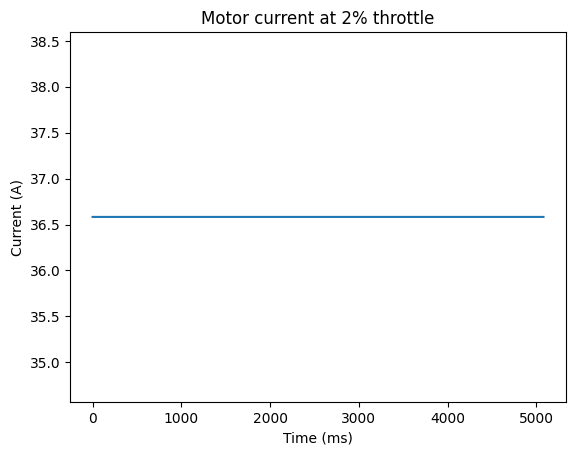

In [24]:
plt.plot(time_ms, runner.values("top_current_A"))
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')
plt.title('Motor current at 2% throttle')

In [14]:
np.mean(runner.values("top_current_A"))*66

2414.4543720000006

In [15]:
np.mean(runner.values("bottom_current_A"))*66

2293.3139460000007

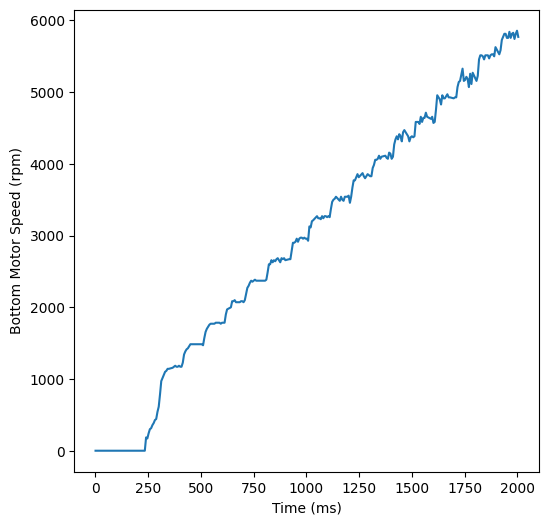

In [17]:
# 4. Save or load from .csv.
runner.save("bottom_motor_sweep_01_13.csv")

loaded_data = TestRunner.load("example_csv.csv")
loaded_data.plot("bottom_motor_rpm")